[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
10666    I like good weed, I like bad bitches that can ...
10667    I like herbal tea bitches no matter if anyone ...
10668    I like how cays mf ass favorited my tweet but ...
10669    I like how niggas try an come at me and im lik...
10670    I like it when you call me McSully I like when ba
Name: tweet, Length: 10671, dtype: object

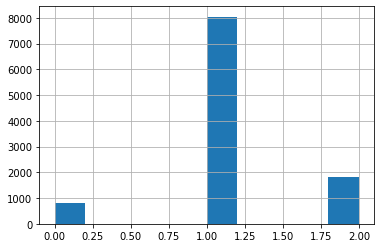

In [5]:
import sklearn.gaussian_process.kernels


import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
import spacy #pos tagging nltk
import nltk
nltk.download('stopwords')

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

df = pd.read_csv("hate_speech.csv")
df.loc[1]['tweet']
#df.loc[1]
df.count
df['class'].hist()
df.describe()

tweets=df.tweet

tweets


In [6]:
stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )


tfidf = vectorizer.fit_transform(tweets).toarray()

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


**Creating training and test data**

In [0]:
X = pd.DataFrame(tfidf)
y = df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
import numpy as np
import math
from numpy.linalg import svd
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.decomposition as skd

def truncated_svd(input,svd_components):
    
  truncated = skd.TruncatedSVD(n_components=svd_components)
    
  return truncated.fit_transform(input)


tfidf = truncated_svd(tfidf,100)

In [9]:
tfidf

array([[ 1.42297914, -0.17017375, -0.08134248, ...,  1.84374761,
        -2.47494721, -0.36903979],
       [ 1.68490561, -0.25735714, -0.18640641, ..., -1.23677532,
         0.52996945,  0.5925554 ],
       [ 2.9946071 , -0.40991842, -0.19315561, ...,  1.04663666,
        -0.67770918, -0.20057689],
       ...,
       [ 2.9167913 , -0.45225845, -0.33507142, ...,  0.09923885,
         0.21296182,  0.22641421],
       [ 5.77331952, -0.78858923, -0.17067347, ...,  0.60915744,
         0.08826657,  0.09586179],
       [ 1.97861576, -0.27893355, -0.23573787, ..., -0.1995931 ,
        -0.1659436 , -0.06986591]])

**RBF Gaussian Kernel SVM**

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                     'C': [0.01, 0.1, 1, 10, 100]}]


grid_search = GridSearchCV(SVC(), tuned_parameters, cv=StratifiedKFold(n_splits=5, 
                                          random_state=1).split(X_train, y_train), 
                           verbose=2)

model = grid_search.fit(X_train, y_train)

y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total= 7.3min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min remaining:    0.0s


[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total= 7.3min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total= 7.2min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total= 7.2min
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total= 7.2min
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total= 8.6min
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total= 8.6min
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total= 8.6min
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .